# Project: Investigating a TMDb Dataset

### By Eduardo Rossel

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will be performing an analysis on a The Movie Database's Dataset. The Movie (TMDb) is a community built movie and TV database.

We will be exploring the data and try to bring answers to some of the following questions:

1. Which movie genre gets made the most?  
    1.1 Which movie genres is the most made in history?  
    1.2 Has this proportion changed in time? 
2. What kinds of properties are associated with movies that have high revenues?  
    2.1. Do movies that have bigger budgets have higher revenues?  
    2.2. Which genres generates a higher revenue?  
    2.3. Is popularity a factor for higher revenues?  
    2.4. Has movie revenue changed over time?
3. Do popular movies share characteristics?  
    3.1. Which genres have more popular movies?  
    3.2. Do popular movies have bigger budgets?  
    

The Dataset we are about to explore, originally has the following columns:

* _id_: TMDb identification
* _imdb_id_: IMDB identification
* _popularity_: User-based score for the movie (Number of total votes, daily votes, views, "favourite", add to watchlist)
* _budget_: Budget for the production of the film in dollars
* _revenue_: Revenue made by the film in dollars
* _original_title_: Title of the Movie
* _cast_: Cast of the Movie
* _homepage_: Official Movie Website
* _director_: Director of the Movie
* _tagline_: Short text or slogan that acompanies the movie title.
* _keywords_: Words used for identify a movie.
* _overview_: Summary of the movie's plot
* _runtime_: Total screening time in minutes
* _genres_: Genre of the movie
* _production_companies_: Studios involved in making the film
* _release_date_: Release date of the movie
* _vote_count_: Number of total votes
* _vote_average_: Daily average votes
* _release_year_: Year of release of the movie
* _budget_adj_: Movie budget in terms of 2010 dollars, accounting for inflation over time .
* _revenue_adj_: Movie revenue in terms of 2010 dollars, accounting for inflation over times.

All the data wrangling, cleaning and exploratory analysis will be made with Pandas, Numpy and Matplotlib.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('TMDb_movie_data.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

First of all, we are going to review some general features of the data. As shown below, the dataset has 10866 row and 21 columns.

In [4]:
df.shape

(10866, 21)

We can display general info of the dataset. Most rows have all of their data and their datatypes seem appropiate. We observe that columns like _homepage_, _tagline_, _keywords_, _production_company_ have a lot of missing values. This missing values should not affect our analysis, as neither of them is going to be used to asked the questions stated above. 
Others columns like _cast_, _director_, _genres_ and _overview_ have less than 100 missing values. Will talk about how to deal with them later.  


In [5]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Let's look at the statistical overwiew of the columns of the dataset that have numerical data.

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Data doesn't appear to show any strange behavior. The release year of the movies in the dataset spans from 1960 to 2015. Budget and revenue are in a Datatype that we can work with. The maximun runtime of a movie is of 900 minutos, which is 15 hours. This does seem strange, but when reviewing the data, we realize it corresponds to "The Story of Film: An Odyssey", a documentary presented on television in 15 one-hour chapters.


In [9]:
df.query("runtime == {}".format(df['runtime'].max()))

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0


We will explore the genres column.

In [11]:
df['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

The last thing we will be doing is to check the distribution of budget and revenue, as we will be focusing our questions on these variables. In both cases we observe a that the distribution is highly right-skewed and actually the median is 0 for these variables. To confirm we do a query and identify there are 5.696 and 6.016 with 0 on "budget_adj" and "revenue_adj" respectively.

0.0
17551039.822886847
3.114919906740763
(5696, 21)


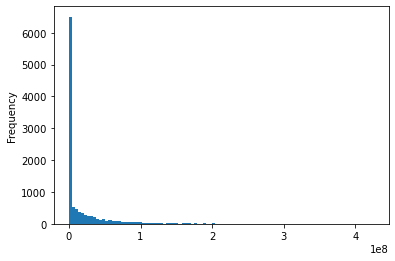

In [12]:
df['budget_adj'].plot(kind='hist',bins=100)
print(df['budget_adj'].median())
print(df['budget_adj'].mean())
print(df['budget_adj'].skew())
print(df.query('budget_adj <= 0').shape)

0.0
51364363.25325093
6.251202093431122
(6016, 21)


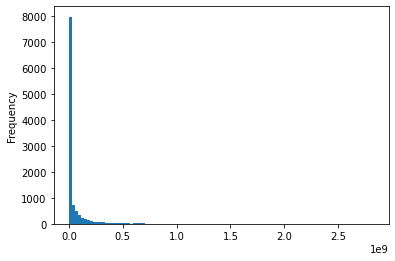

In [13]:
df['revenue_adj'].plot(kind='hist',bins=100)
print(df['revenue_adj'].median())
print(df['revenue_adj'].mean())
print(df['revenue_adj'].skew())
print(df.query('revenue_adj <= 0').shape)

### Data Cleaning (Replace this with more specific notes!)

In order to work with the dataset we will be doing the following:
* Eliminating duplicates
* Drop columns
* Working with NAs
* Working with "Cast" and "Genres" columns

#### Eliminating duplicates

First, we'll check if there are any duplicates

In [14]:
sum(df.duplicated())

1

There is only one, so we will be going to drop the duplicated column. That leaves us with 10.865 rows and 21 columns.  


In [15]:
df.drop_duplicates(inplace = True)
df.shape

(10865, 21)

#### Dropping Columns

We will be dropping columns that we won´t be using, such as: imdb_id, cast, homepage, tagline, keywords, overwiew, production_companies.

In [16]:
df.drop(['imdb_id','id','budget','revenue','release_date','director','homepage','tagline', 'keywords', 'overview', 'production_companies'], axis = 1, inplace = True)
df.shape

(10865, 10)

#### Working with NAs

There are 44 and 23 NaN in the director and genres columns. As this is a small portion of our dataset (only a 0.6% of our entire database, we will be dropping these NAs.

In [17]:
df.isnull().sum()

popularity         0
original_title     0
cast              76
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [18]:
df.dropna(inplace=True)
df.shape

(10767, 10)

#### Working with cast and genres data

In [19]:
### Create a set with the movie genres. Choosing a set will help us keep only unique entries.
movie_genres = set()
for genres in df['genres']:
    for genre in genres.split('|'):
        movie_genres.add(genre)
print(movie_genres)

### Creating a diffent column for each genre with True value if the movie genre is contained in the original 'genres' column
for genre in movie_genres:
    genre_in_list = []
    for value in df['genres']:
        if genre in value:
            genre_in_list.append(True)
        else:
            genre_in_list.append(False)
    df[genre] = genre_in_list
print(df.isnull().sum().sum())
print(df.shape)



{'Science Fiction', 'Crime', 'TV Movie', 'Thriller', 'Family', 'War', 'Music', 'Horror', 'Western', 'Action', 'History', 'Foreign', 'Comedy', 'Adventure', 'Documentary', 'Animation', 'Mystery', 'Romance', 'Fantasy', 'Drama'}
0
(10767, 30)


In [20]:
df.columns

Index(['popularity', 'original_title', 'cast', 'runtime', 'genres',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'Science Fiction', 'Crime', 'TV Movie', 'Thriller',
       'Family', 'War', 'Music', 'Horror', 'Western', 'Action', 'History',
       'Foreign', 'Comedy', 'Adventure', 'Documentary', 'Animation', 'Mystery',
       'Romance', 'Fantasy', 'Drama'],
      dtype='object')

#### Working with budget and revenue

As we saw earlier in this exploration, we have a lot of null values in budget and revenue. A more detail inspection allows us to observe that for adjusted budget and revenue, the missing values are "evenly" distribuited along the years, at least when seen in proportion. Even if we drop all of this 0 values,we still keep in average 50% of the movie data by year.
A similar analysis is observed when inspecting adjusted revenue values.  

After dropping the stated values, we end up with roughly 35% of the data. This is clearly not the best option, but as far as an exploratory analysis it will suffice. we'll call this dataset **df_revenue_analysis**.



In [21]:
print((df.query('budget_adj <= 0')['release_year'].value_counts()/df['release_year'].value_counts()).describe())
print((df.query('budget_adj <= 0')['release_year'].value_counts()/df['release_year'].value_counts()).skew())

count    56.000000
mean      0.543301
std       0.096371
min       0.334821
25%       0.486046
50%       0.537961
75%       0.594651
max       0.739130
Name: release_year, dtype: float64
0.05314481761360372


In [22]:
print((df.query('revenue_adj <= 0')['release_year'].value_counts()/df['release_year'].value_counts()).describe())
print((df.query('revenue_adj <= 0')['release_year'].value_counts()/df['release_year'].value_counts()).skew())

count    56.000000
mean      0.570784
std       0.135886
min       0.350000
25%       0.473567
50%       0.537083
75%       0.662075
max       0.891304
Name: release_year, dtype: float64
0.5073828949006067


In [23]:
df_revenue_analysis = df.copy()
print(df_revenue_analysis.shape)


(10767, 30)


In [24]:
df_revenue_analysis = df_revenue_analysis.drop(df_revenue_analysis[df_revenue_analysis['revenue_adj'] <= 0].index)
print(df_revenue_analysis.shape)

(4844, 30)


In [25]:
df_revenue_analysis = df_revenue_analysis.drop(df_revenue_analysis[df_revenue_analysis['budget_adj'] <= 0].index)
print(df_revenue_analysis.shape)

(3850, 30)


We will check the descriptional statistics of the new dataset.

In [38]:
df_revenue_analysis.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3.850000e+03,3.850000e+03
mean,1.192661,109.228831,528.252727,6.168597,2001.260000,4.428320e+07,1.371986e+08
std,1.475527,19.924053,880.258758,0.794616,11.284699,4.481243e+07,2.161832e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.463201,95.250000,71.000000,5.700000,1995.000000,1.314346e+07,1.841498e+07
50%,0.798343,106.000000,204.500000,6.200000,2004.000000,3.004524e+07,6.179073e+07
75%,1.372826,119.000000,580.750000,6.700000,2010.000000,6.072867e+07,1.633775e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [37]:
print(df_revenue_analysis['revenue_adj'].median())
print(df_revenue_analysis['revenue_adj'].mean())
print(df_revenue_analysis['revenue_adj'].skew())

61790728.18444909
137198567.79854968
4.044930243020112


In [40]:
print(df_revenue_analysis['budget_adj'].median())
print(df_revenue_analysis['budget_adj'].mean())
print(df_revenue_analysis['budget_adj'].skew())

30045238.967454296
44283196.401986584
1.963740828145617


<a id='eda'></a>
## Exploratory Data Analysis

### 1. Which movie genres gets made the most?
#### Which movie genres is the most common in our data set?

We can see that the top 5 more common movie genres are, from top to bottom: Drama (17,7% of total), Comedy (14,1%), Thriller (10,8%), Action (8,8%) and Romance (6,3%). This makes sense as these are the broadest genres. We have to remember that in our original data genres where grouped in up to four categories for a movie. For that reason we have 26.831 movies according to the numbers in the plot, nevertheless this plot is useful to crearly identify the most common movie genres.



26831


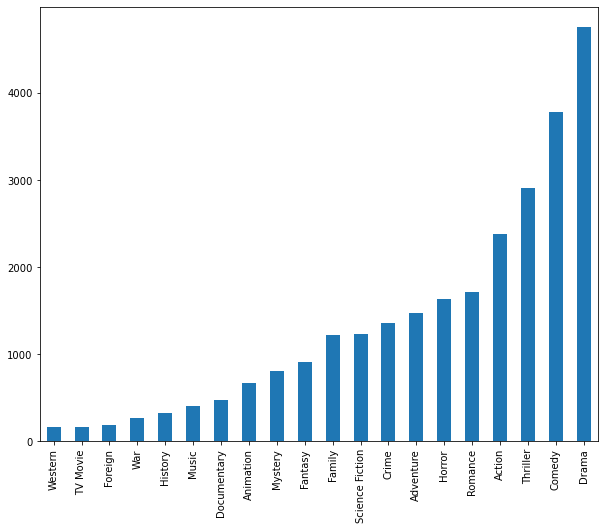

In [26]:
# All time favorites
movie_genres_list = list(movie_genres)
df[movie_genres_list].sum().sort_values().plot(kind='bar',figsize=(10,8))
print(df[movie_genres_list].sum().sort_values().sum())

#### Has this proportion changed in time?

Even though the number of made movies year by year increases, the proportion of the genre of the movies made keeps very similar as the years go by. We observe that our top 5 its very much the same as in the historical top 5. This makes sense as these genres are very broad.


In [102]:
movie_genres_list = list(movie_genres)

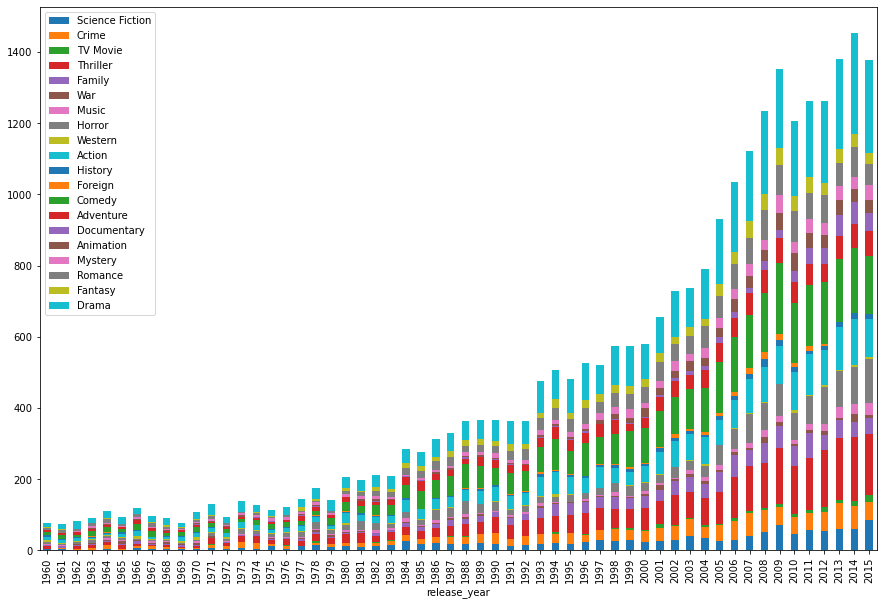

In [86]:
df.groupby('release_year')[movie_genres_list].sum().plot(kind='bar',stacked=True,figsize=(15,10));


### 2. What kinds of properties are associated with movies that have high revenues? 

Up next, we will be focusing on which characteristic of a movie are related to generate a high revenue. We'll try the following questions.
* Do movies that have bigger budgets have higher revenues?
* Which genres generates a higher revenue?
* Is popularity a factor for higher revenues?
* Has movie revenue changed over time?

For all these questions we'll use our **df_revenue_analysis** database

#### Do movies that have bigger budgets have higher revenues?

We'll start by looking for a relation between budget and revenue. In order to do this, we'll create a scatterplot between the adjusted budget and revenue. The result below shows us that there is a moderate correlation between these variables, that means that if a movie has a higher budget it's likely that it generates a higher budget. 

The range of the adjusted budget is enormous, so we'll repeat this analysis creating two subsets cuted by the median of the adjusted budget. This will allow us to see if there is a different correlation between movies that have a lower budget and their revenue, to those who have a larger one.


In [73]:
df_revenue_analysis_budget_range = df_revenue_analysis['budget_adj'].max()-df_revenue_analysis['budget_adj'].min()
df_revenue_analysis_budget_range

424999999.030602

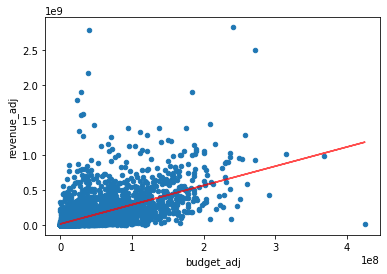

In [74]:
df_revenue_analysis.plot(kind='scatter', x='budget_adj', y='revenue_adj')
m, b = np.polyfit(x=df_revenue_analysis['budget_adj'], y=df_revenue_analysis['revenue_adj'],deg=1)
plt.plot(df_revenue_analysis['budget_adj'],(m*df_revenue_analysis['budget_adj']+b), color='red', alpha=0.7);

In [36]:
df_revenue_analysis[['budget_adj','revenue_adj']].corr()

,budget_adj,revenue_adj
budget_adj,1.000000,0.570238
revenue_adj,0.570238,1.000000


As detailed above, we will use the median to divide our dataset into two subsets, one with movies with a budget lower than the median an another one with a budget above. We use the median and not the mean, because of the high value of the skewness observed for the adjusted budget.

The results show that for movies with a budget lower than 30 MM USD there is very low correlation between budget and revenue. As for movies that have a budget higher than 30 MM USD, we do observe a moderate correlation. This is a sign that for movies, in this budget range, there is a chance in having higher revenue as a higher investment is made.  

In [69]:
# Create separate datasets considering the median of the adjusted budget
df_above_median_budget = df_revenue_analysis[['budget_adj','revenue_adj']].query('budget_adj >= {}'.format(df_revenue_analysis['budget_adj'].median()))
df_below_median_budget = df_revenue_analysis[['budget_adj','revenue_adj']].query('budget_adj < {}'.format(df_revenue_analysis['budget_adj'].median()))

,budget_adj,revenue_adj
budget_adj,1.000000,0.231343
revenue_adj,0.231343,1.000000


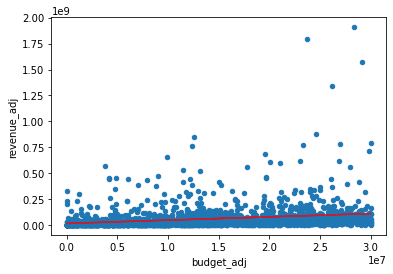

In [64]:
# Scatterplot for adjusted budget and revenue for below median budgets
df_below_median_budget.plot(kind='scatter', x='budget_adj', y='revenue_adj')
# We will be adding a linear reg to clearly see the correlation
m, b = np.polyfit(x=df_below_median_budget['budget_adj'], y=df_below_median_budget['revenue_adj'],deg=1)
plt.plot(df_below_median_budget['budget_adj'],(m*df_below_median_budget['budget_adj']+b), color='red', alpha=0.7)
df_below_median_budget[['budget_adj','revenue_adj']].corr()

,budget_adj,revenue_adj
budget_adj,1.000000,0.508475
revenue_adj,0.508475,1.000000


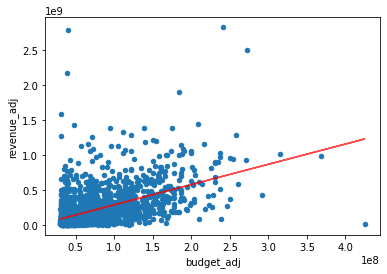

In [65]:
# Scatterplot for adjusted budget and revenue for above median budgets
df_above_median_budget.plot(kind='scatter', x='budget_adj', y='revenue_adj')
# We will be adding a linear reg to clearly see the correlation
m, b = np.polyfit(x=df_above_median_budget['budget_adj'], y=df_above_median_budget['revenue_adj'],deg=1)
plt.plot(df_above_median_budget['budget_adj'],(m*df_above_median_budget['budget_adj']+b), color='red', alpha=0.7)
df_above_median_budget[['budget_adj','revenue_adj']].corr()

#### Which genres generate a higher revenue?

We will be calculating the mean adjusted revenue for every genre. It's important to keep in mind that originally in our dataset, we had several genres assigned to a movie, so a movie may end up adding revenue in several columns. Overall it is still a good aproximation on which genres are asociated with higher revenues. 

The data shows that Action, Adventure, Drama, Comedy and Thriller are the genres that have higher mean adjusted revenue. The list is similar to our top 5 most common genre list for movies, only in this case we have Adventure instead of Romance. It's worth noticing that Action and Adventure are the genres that have a higher mean adjusted revenue. 


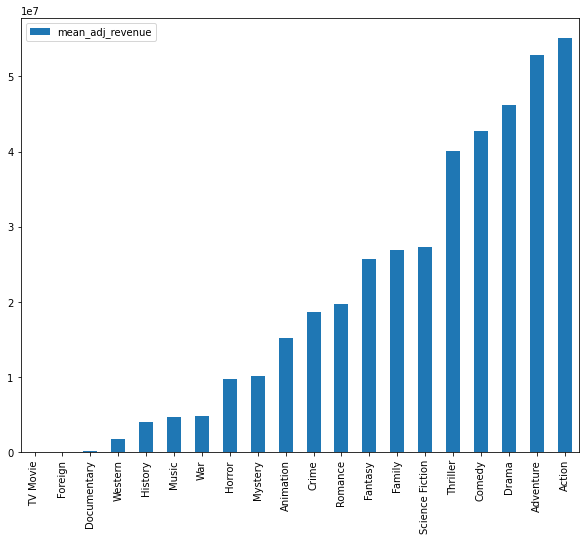

In [123]:
genre_revenue_dict = {}

for genre in movie_genres_list:
    genre_revenue_dict[genre] = (df_revenue_analysis[genre]*df_revenue_analysis['revenue_adj']).mean()

genre_revenue_dict
df_genre_revenue = pd.DataFrame.from_dict(genre_revenue_dict,orient='index', columns={'mean_adj_revenue'}).sort_values('mean_adj_revenue')

df_genre_revenue.plot(kind='bar', figsize =(10,8));


#### Is popularity related to higher revenues?

The plot below shows that there is a moderate positive correlation between the popularity of a film and its revenue. So we can affirm that there is a relation between this two variables. It makes sense that films more popular may translate in higher tickets sales and thus in achieving a higher revenue. 

,popularity,revenue_adj
popularity,1.000000,0.546764
revenue_adj,0.546764,1.000000


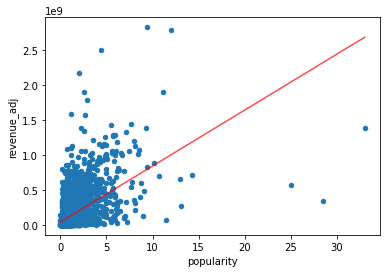

In [126]:
df_revenue_analysis.plot(kind='scatter', x='popularity', y='revenue_adj')
m, b = np.polyfit(x=df_revenue_analysis['popularity'], y=df_revenue_analysis['revenue_adj'],deg=1)
plt.plot(df_revenue_analysis['popularity'],(m*df_revenue_analysis['popularity']+b), color='red', alpha=0.7);

df_revenue_analysis[['popularity','revenue_adj']].corr()


#### Has movie revenue changed over time?

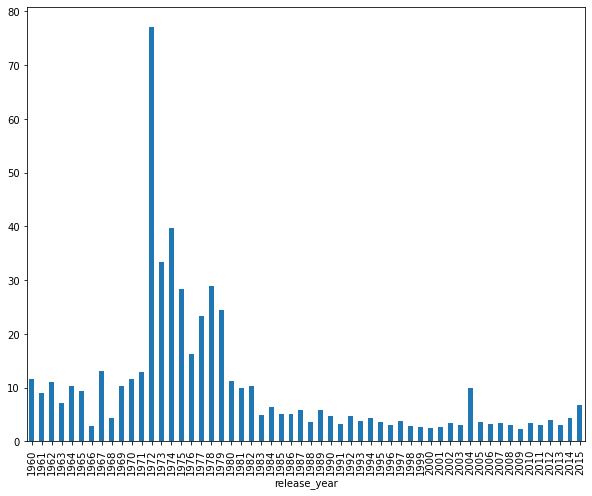

In [140]:
df_revenue_analysis['revenue/budget'] = df_revenue_analysis['revenue_adj']/df_revenue_analysis['budget_adj']

df_revenue_analysis.query('budget_adj > 50000').groupby('release_year')['revenue/budget'].mean().plot(kind='bar', figsize = (10,8));

In [152]:
df_revenue_analysis.query('release_year == 1960')['revenue/budget'].mean()

11.561618238102069

<AxesSubplot:xlabel='release_year'>

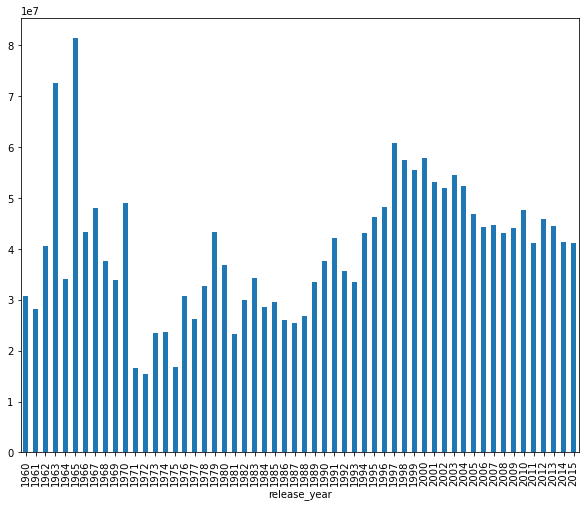

In [156]:
df_revenue_analysis.groupby('release_year')['budget_adj'].mean().plot(kind='bar', figsize=(10,8))

### 3. Do popular movies share characteristics?  


#### Which genres have more popular movies?  


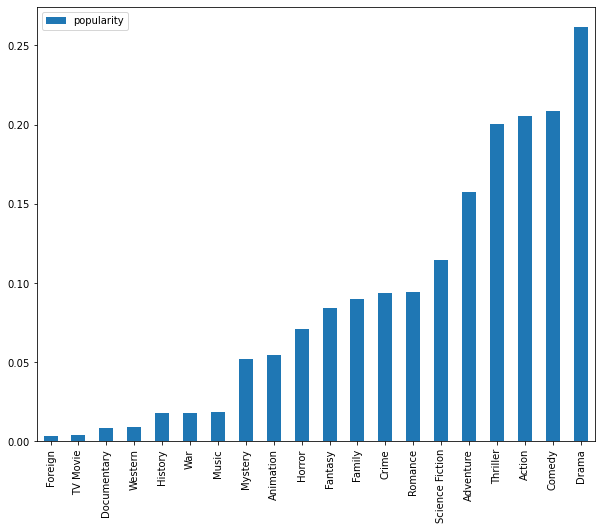

In [142]:
genre_popularity_dict = {}

for genre in movie_genres_list:
    genre_popularity_dict[genre] = (df[genre]*df['popularity']).mean()

genre_popularity_dict
df_genre_popularity = pd.DataFrame.from_dict(genre_popularity_dict,orient='index', columns={'popularity'}).sort_values('popularity')

df_genre_popularity.plot(kind='bar', figsize =(10,8));

#### Do popular movies have bigger budgets?  

,budget_adj,popularity
budget_adj,1.000000,0.398945
popularity,0.398945,1.000000


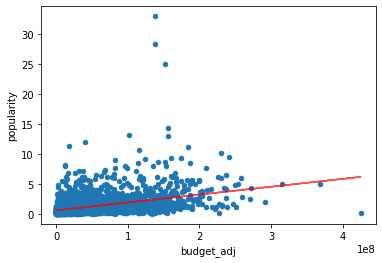

In [146]:
# Scatterplot
df_revenue_analysis.plot(kind='scatter', x='budget_adj', y='popularity')
# We will be adding a linear reg to clearly see the correlation
m, b = np.polyfit(x=df_revenue_analysis['budget_adj'], y=df_revenue_analysis['popularity'],deg=1)
plt.plot(df_revenue_analysis['budget_adj'],(m*df_revenue_analysis['budget_adj']+b), color='red', alpha=0.7)
df_revenue_analysis[['budget_adj','popularity']].corr()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!